# My First Convolutional Neural Network : Fashion MNIST
---
#### 실습목표
1. CNN의 기본 아이디어를 안다.
2. CNN의 구조를 그리고, 코드로 옮길 수 있다.

### Keras Upgrade

In [ ]:
!pip install --upgrade keras

In [ ]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

## Real Game : CNN on Fashion MNIST

여기에서는 여러분이 직접 코드를 완성해야 하는 문제가 곳곳에 있습니다!

In [ ]:
'''
라이브러리들을 불러오자.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd
from sklearn.metrics import accuracy_score

import keras

### Data Loading

In [ ]:
(train_x, train_y), (test_x, test_y) = keras.datasets.fashion_mnist.load_data()

In [ ]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
labels = ["T-shirt/top",  # index 0
            "Trouser",      # index 1
            "Pullover",     # index 2
            "Dress",        # index 3
            "Coat",         # index 4
            "Sandal",       # index 5
            "Shirt",        # index 6
            "Sneaker",      # index 7
            "Bag",          # index 8
            "Ankle boot"]   # index 9

print(labels)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


id = 4793
다음 그림은 Sandal 입니다.


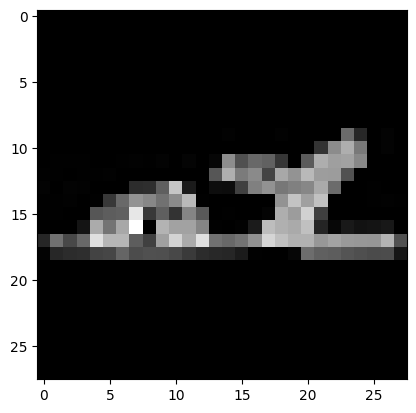

In [ ]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 {labels[test_y[id]]} 입니다.')

plt.imshow(test_x[id], cmap='gray')
plt.show()

### X : Min-Max Scaling

- 최소값 0, 최대값 1로 통일하는 스케일링

In [ ]:
max_n, min_n = train_x.max(), train_x.min()

train_x = (train_x - min_n) / (max_n - min_n)
test_x = (test_x - min_n) / (max_n - min_n)

In [ ]:
train_x.max(), train_x.min()

(1.0, 0.0)

### X : Reshape(# of data, 28, 28, 1)

- **끝에 1을 달아서 그레이스케일(흑백)을 명시해준다.**

In [ ]:
_, h, w = train_x.shape
train_x = train_x.reshape((-1, 28, 28, 1))
test_x = test_x.reshape((-1, 28, 28, 1))

print(train_x.shape, train_y.shape, test_x.shape, test_y.shape, h, w)

(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,) 28 28


In [ ]:
train_x[:10]

array([[[[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.  

### Y : One-Hot Encoding

In [ ]:
from keras.utils import to_categorical

class_n = len(np.unique(train_y))
class_n

10

In [ ]:
train_y = to_categorical(train_y, class_n)
test_y = to_categorical(test_y, class_n)

In [ ]:
train_y.shape

(60000, 10)

### 코드를 완성해주세요!

- **자유롭게 먼저 해보는 것을 추천**
---
- **구조를 따라서 코딩을 한다면..**

    1. 인풋 레이어
    2. Convolution : 필터수 32개, 사이즈(3, 3), same padding
    3. BatchNormalization
    4. Convolution : 필터수 32개, 사이즈(3, 3), same padding
    5. BatchNormalization
    6. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
    7. DropOut : 25% 비활성화
    8. Convolution : 필터수 64개, 사이즈(3, 3), same padding
    9. BatchNormalization
    10. Convolution : 필터수 64개, 사이즈(3, 3), same padding
    11. BatchNormalization
    12. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
    13. DropOut : 25% 비활성화
    14. Flatten
    15. Fully Connected Layer : 노드 512개
    16. BatchNormalization
    17. 아웃풋 레이어

In [ ]:
import keras

from keras.utils import clear_session
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Flatten, BatchNormalization, Dropout
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

In [ ]:
## Sequential API
## 1. 세션 클리어 : 메모리에 남아있는 모델 구조를 없애줘.
clear_session()

## 2. 모델 발판 선언 : 순차적으로!
model1 = Sequential()

## 3. 레이어 블록 조립 : .add( )
# 인풋 레이어
model1.add( Input(shape=(28,28,1)) )
# Convolution : 필터수 32개, 사이즈(3, 3), same padding
model1.add( Conv2D(filters=32,        # 새롭게 제작하려는 feature map의 수
                   kernel_size=(3,3), # Conv2D filter의 가로세로 사이즈 (depth는 케라스 자동 보정)
                   strides=(1,1),     # Conv2D filter의 이동 보폭
                   padding='same',    # 1.feature map 사이즈 유지 | 2.외곽 정보 반영
                   activation='relu'
                   ) )
# BatchNormalization
model1.add( BatchNormalization() )
# Convolution : 필터수 32개, 사이즈(3, 3), same padding
model1.add( Conv2D(filters=32,        # 새롭게 제작하려는 feature map의 수
                   kernel_size=(3,3), # Conv2D filter의 가로세로 사이즈 (depth는 케라스 자동 보정)
                   strides=(1,1),     # Conv2D filter의 이동 보폭
                   padding='same',    # 1.feature map 사이즈 유지 | 2.외곽 정보 반영
                   activation='relu'
                   ) )
# BatchNormalization
model1.add( BatchNormalization() )
# MaxPooling : 사이즈(2,2) 스트라이드(2,2)
model1.add( MaxPool2D(pool_size=(2,2),  # Maxpool filter의 가로세로 사이즈
                      strides=(2,2)     # Maxpool filter의 이동 보폭 (기본적으로 pool_size를 따름)
                      ) )
# DropOut : 25% 비활성화
model1.add( Dropout(0.25) )
# Convolution : 필터수 64개, 사이즈(3, 3), same padding
model1.add( Conv2D(filters=64,        # 새롭게 제작하려는 feature map의 수
                   kernel_size=(3,3), # Conv2D filter의 가로세로 사이즈 (depth는 케라스 자동 보정)
                   strides=(1,1),     # Conv2D filter의 이동 보폭
                   padding='same',    # 1.feature map 사이즈 유지 | 2.외곽 정보 반영
                   activation='relu'
                   ) )
# BatchNormalization
model1.add( BatchNormalization() )
# Convolution : 필터수 64개, 사이즈(3, 3), same padding
model1.add( Conv2D(filters=64,        # 새롭게 제작하려는 feature map의 수
                   kernel_size=(3,3), # Conv2D filter의 가로세로 사이즈 (depth는 케라스 자동 보정)
                   strides=(1,1),     # Conv2D filter의 이동 보폭
                   padding='same',    # 1.feature map 사이즈 유지 | 2.외곽 정보 반영
                   activation='relu'
                   ) )
# BatchNormalization
model1.add( BatchNormalization() )
# MaxPooling : 사이즈(2,2) 스트라이드(2,2)
model1.add( MaxPool2D(pool_size=(2,2),  # Maxpool filter의 가로세로 사이즈
                      strides=(2,2)     # Maxpool filter의 이동 보폭 (기본적으로 pool_size를 따름)
                      ) )
# DropOut : 25% 비활성화
model1.add( Dropout(0.25) )
# Flatten
model1.add( Flatten() )
# Fully Connected Layer : 노드 512개
model1.add( Dense(512, activation='relu') )
# BatchNormalization
model1.add( BatchNormalization() )
# 아웃풋 레이어
model1.add( Dense(10, activation='softmax') )

## 4. 컴파일
model1.compile(optimizer=Adam(), loss=categorical_crossentropy,
               metrics=['accuracy']
               )

## 양념
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,606,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,679,082 (6.41 MB)

 Trainable params: 1,677,674 (6.40 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [ ]:
## Functional API
## 1.세션 클리어
clear_session()

## 2.레이어 연결
# 인풋 레이어
il = Input(shape=(28,28,1))
# Convolution : 필터수 32개, 사이즈(3, 3), same padding
hl = Conv2D(32, (3,3), (1,1), 'same', activation='relu')(il)
# BatchNormalization
hl = BatchNormalization()(hl)
# Convolution : 필터수 32개, 사이즈(3, 3), same padding
hl = Conv2D(32, (3,3), (1,1), 'same', activation='relu')(hl)
# BatchNormalization
hl = BatchNormalization()(hl)
# MaxPooling : 사이즈(2,2) 스트라이드(2,2)
hl = MaxPool2D((2,2), (2,2))(hl)
# DropOut : 25% 비활성화
hl = Dropout(0.25)(hl)
# Convolution : 필터수 64개, 사이즈(3, 3), same padding
hl = Conv2D(64, (3,3), (1,1), 'same', activation='relu')(hl)
# BatchNormalization
hl = BatchNormalization()(hl)
# Convolution : 필터수 64개, 사이즈(3, 3), same padding
hl = Conv2D(64, (3,3), (1,1), 'same', activation='relu')(hl)
# BatchNormalization
hl = BatchNormalization()(hl)
# MaxPooling : 사이즈(2,2) 스트라이드(2,2)
hl = MaxPool2D((2,2), (2,2))(hl)
# DropOut : 25% 비활성화
hl = Dropout(0.25)(hl)
# Flatten
hl = Flatten()(hl)
# Fully Connected Layer : 노드 512개
hl = Dense(512, activation='relu')(hl)
# BatchNormalization
hl = BatchNormalization()(hl)
# 아웃풋 레이어
ol = Dense(10, activation='softmax')(hl)

## 3.모델 시작과 끝 지정
model2 = Model(il, ol)

## 4. 컴파일
model2.compile(optimizer=Adam(), loss=categorical_crossentropy,
               metrics=['accuracy'])

## 양념
model2.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,606,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,679,082 (6.41 MB)

 Trainable params: 1,677,674 (6.40 MB)

 Non-trainable params: 1,408 (5.50 KB)

### Early Stopping을 활용한 학습

- 조건
    1. validation_split = 0.2
    2. 1 epochs만 관찰해가며 속도가 가장 빠른 batch_size 찾아보기. 128개부터 시작하여 조절해볼 것.
    3. EarlyStopping. val_loss가 5 epoch 전과 비교하여 개선되지 않으면 스탑
    4. 이미지 시각화를 위해 hist 변수에 학습 과정을 넣어주세요.


In [ ]:
es = EarlyStopping(monitor='val_loss',       # 학습 과정에서 얼리 스토핑을 적용할 관측 지표
                   min_delta=0,              # Threshold. 이 값보다는 더 크게 변해야 성능 개선으로 간주.
                   patience=5,               # 성능 개선이 발생하지 않을 때, 몇 epochs 더 볼 것인가.
                   verbose=1,
                   restore_best_weights=True # 학습이 멈췄을 때, 최적 epoch 시점의 가중치로 되돌림.
                   )

In [ ]:
hist = model1.fit(train_x, train_y, validation_split=0.2,
                  epochs=10000, verbose=1,
                  callbacks=[es]
                  )

Epoch 1/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 6ms/step - accuracy: 0.8083 - loss: 0.5610 - val_accuracy: 0.8996 - val_loss: 0.2823
Epoch 2/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8952 - loss: 0.2874 - val_accuracy: 0.9068 - val_loss: 0.2546
Epoch 3/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9065 - loss: 0.2560 - val_accuracy: 0.9015 - val_loss: 0.2736
Epoch 4/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9183 - loss: 0.2198 - val_accuracy: 0.9128 - val_loss: 0.2361
Epoch 5/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9263 - loss: 0.1971 - val_accuracy: 0.9195 - val_loss: 0.2166
Epoch 6/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9324 - loss: 0.1836 - val_accuracy: 0.9259 - val_loss: 0.2047
Epoch 7/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9391 - loss: 0.1630 - val_accuracy: 0.9222 - val_loss: 0.2167
Epoch 8/10000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy

In [ ]:
performance_test = model.evaluate(test_x, test_y)
print(f'Test Loss : {performance_test[0]:.6f} | Test Accuracy : {performance_test[1]*100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9287 - loss: 0.2148
Test Loss : 0.208013 | Test Accuracy : 92.80%


### 이미지 시각화

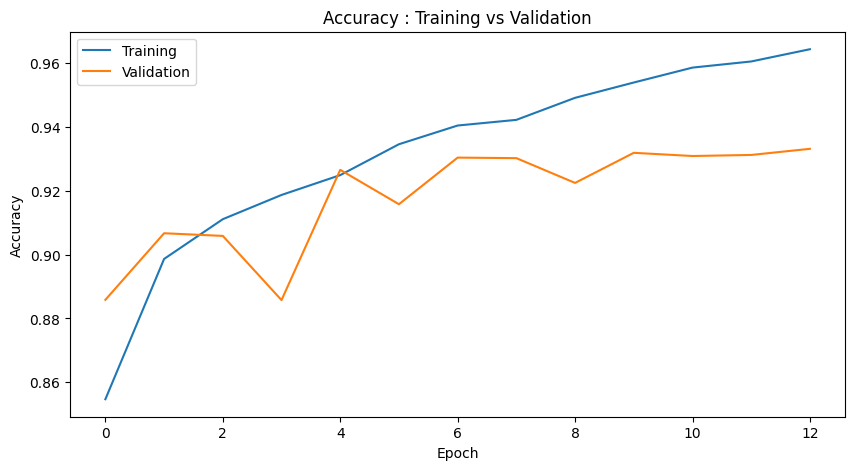

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

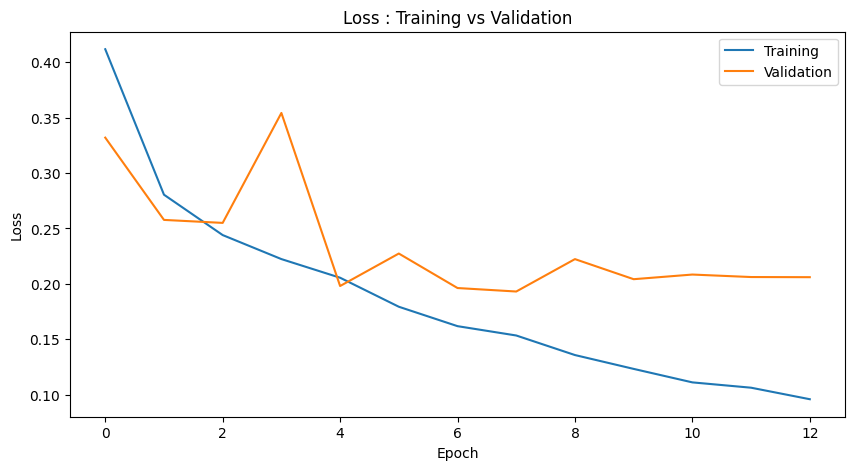

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

In [ ]:
y_pred = model.predict(test_x)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [ ]:
single_y_pred = y_pred.argmax(axis=1)
single_y_pred.shape

(10000,)

In [ ]:
print(test_y.shape)
single_test_y = test_y.argmax(axis=1)
print(single_test_y.shape)

(10000, 10)
(10000,)


In [ ]:
test_acc = accuracy_score(single_test_y, single_y_pred)

print(f'테스트셋 정확도 : {test_acc*100:.2f}%' )

테스트셋 정확도 : 92.80%


id = 4762
다음 그림은 숫자 Ankle boot 입니다.
모델의 예측 : Ankle boot
모델의 카테고리별 확률 : [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 99.]
정답입니다


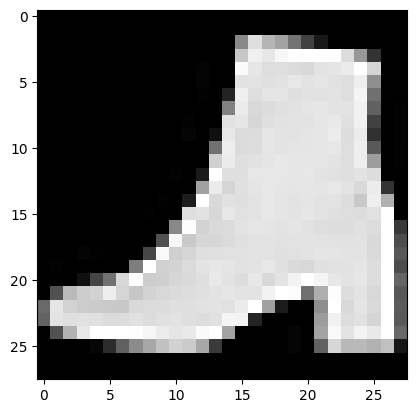

In [ ]:
'''
성능 확인을 위해
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 숫자 {labels[single_test_y[id]]} 입니다.')
print(f'모델의 예측 : {labels[single_y_pred[id]]}')
print(f'모델의 카테고리별 확률 : {np.floor(y_pred[id]*100)}')

if single_test_y[id] == single_y_pred[id] :
    print('정답입니다')
else :
    print('틀렸어요')

plt.imshow(test_x[id].reshape([28,-1]), cmap='gray')
plt.show()

id = 410
다음 그림은 숫자 T-shirt/top 입니다.
모델의 예측 : Shirt
모델의 카테고리별 확률 : [18.  0.  0.  0.  0.  0. 81.  0.  0.  0.]
틀렸어요


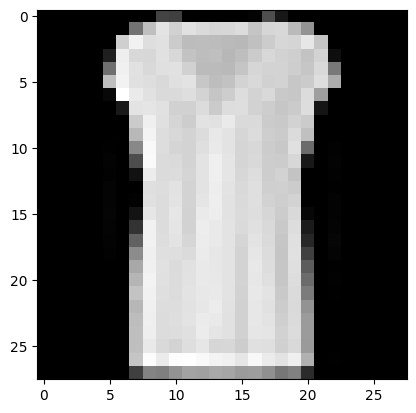

In [ ]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (single_test_y==single_y_pred)
f_id = np.where(true_false==False)[0]        # 틀린 것들의 인덱스 반환
f_n = len(f_id)                              # 틀린 것들이 총 몇 개나 될까?

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}')
print(f'다음 그림은 숫자 {labels[single_test_y[id]]} 입니다.')
print(f'모델의 예측 : {labels[single_y_pred[id]]}')
print(f'모델의 카테고리별 확률 : {np.floor(y_pred[id]*100)}')

if single_test_y[id] == single_y_pred[id] :
    print('정답입니다')
else :
    print('틀렸어요')

plt.imshow(test_x[id].reshape([28,-1]), cmap='gray')
plt.show()